In [ ]:
!pip install pandas numpy sklearn mlrose_hiive mlrose seaborn

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import mlrose_hiive as mlrose
import mlrose as mlrose_old
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns
import time

from mlrose_hiive.algorithms.decay import GeomDecay


#Random State
rs = 614

In [ ]:
class Data():
    def dataAllocation(self, path):
        df = pd.read_csv(path)
        x_data = df.iloc[:, :-1]
        y_data = df.iloc[:, -1 ]
        return x_data,y_data

    def trainSets(self,x_data,y_data):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = rs, shuffle = True)
        return x_train, x_test, y_train, y_test
dataset = Data()
x1_data,y1_data = dataset.dataAllocation('pima-indians-diabetes.csv')
x1_train, x1_test, y1_train, y1_test = dataset.trainSets(x1_data,y1_data)
scaler = StandardScaler()
scaled_x1_train = scaler.fit_transform(x1_train)
scaled_x1_test = scaler.transform(x1_test)

In [ ]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']
algorithm = algorithms[0]

In [ ]:
results = []
for i in range(1, 5002, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        

[1, 'random_hill_climb', 0.521415270018622, 0.49783549783549785, 0.38947368421052625]
[101, 'random_hill_climb', 0.6089385474860335, 0.6190476190476191, 0.4358974358974359]
[201, 'random_hill_climb', 0.7411545623836127, 0.7056277056277056, 0.5342465753424657]
[301, 'random_hill_climb', 0.7653631284916201, 0.7272727272727273, 0.5190839694656489]
[401, 'random_hill_climb', 0.7839851024208566, 0.7532467532467533, 0.6013986013986014]
[501, 'random_hill_climb', 0.7914338919925512, 0.7445887445887446, 0.593103448275862]
[601, 'random_hill_climb', 0.7914338919925512, 0.7229437229437229, 0.5675675675675677]
[701, 'random_hill_climb', 0.7951582867783985, 0.7359307359307359, 0.5793103448275863]
[801, 'random_hill_climb', 0.7932960893854749, 0.7316017316017316, 0.5507246376811594]
[901, 'random_hill_climb', 0.8044692737430168, 0.7316017316017316, 0.5507246376811594]
[1001, 'random_hill_climb', 0.8026070763500931, 0.7359307359307359, 0.5611510791366906]
[1101, 'random_hill_climb', 0.80819366852886

In [ ]:
df = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])

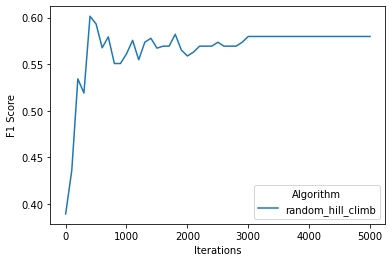

In [ ]:
sns.lineplot(data=df, x="Iterations", y="F1 Score", hue="Algorithm")

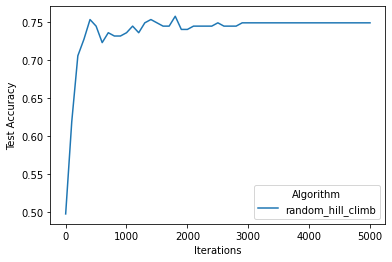

In [ ]:
sns.lineplot(data=df, x="Iterations", y="Test Accuracy", hue="Algorithm")

In [ ]:
results = []
for i in range(1, 11):
    model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm=algorithm, max_iters=3000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                restarts=10)
    model.fit(scaled_x1_train, y1_train)
    y_train_pred = model.predict(scaled_x1_train)
    y_train_accuracy = accuracy_score(y1_train, y_train_pred)

    y_test_pred = model.predict(scaled_x1_test)
    y_test_accuracy = accuracy_score(y1_test, y_test_pred)

    f1score = f1_score(y1_test, y_test_pred)
    results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
    print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])


[1, 'random_hill_climb', 0.7988826815642458, 0.7272727272727273, 0.5401459854014599]
[2, 'random_hill_climb', 0.8119180633147114, 0.7186147186147186, 0.5454545454545454]
[3, 'random_hill_climb', 0.813780260707635, 0.7316017316017316, 0.5303030303030304]
[4, 'random_hill_climb', 0.7988826815642458, 0.7142857142857143, 0.4923076923076923]
[5, 'random_hill_climb', 0.8044692737430168, 0.7445887445887446, 0.5426356589147286]
[6, 'random_hill_climb', 0.8081936685288641, 0.7489177489177489, 0.5671641791044777]
[7, 'random_hill_climb', 0.8081936685288641, 0.7575757575757576, 0.5757575757575758]
[8, 'random_hill_climb', 0.8044692737430168, 0.7229437229437229, 0.5362318840579711]
[9, 'random_hill_climb', 0.8175046554934823, 0.7445887445887446, 0.593103448275862]
[10, 'random_hill_climb', 0.8175046554934823, 0.70995670995671, 0.49624060150375937]


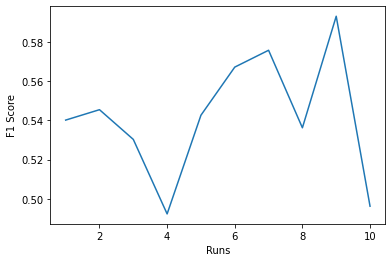

In [ ]:
runs = pd.DataFrame(results, columns=["Runs", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=runs, x="Runs", y="F1 Score")

In [ ]:
df.to_csv("nn_sa_ex1.csv", index=False)

In [ ]:
runs.to_csv("nn_sa_ex2.csv", index=False)

In [ ]:
algorithms[1]

'simulated_annealing'

In [ ]:
results = []
algorithm='simulated_annealing'
for i in range(1, 20000, 1000):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
  

[1, 'simulated_annealing', 0.521415270018622, 0.4935064935064935, 0.38743455497382195]
[1001, 'simulated_annealing', 0.4450651769087523, 0.4025974025974026, 0.3893805309734514]
[2001, 'simulated_annealing', 0.5791433891992551, 0.5627705627705628, 0.4161849710982659]
[3001, 'simulated_annealing', 0.5232774674115456, 0.5670995670995671, 0.4623655913978495]
[4001, 'simulated_annealing', 0.553072625698324, 0.5800865800865801, 0.5125628140703516]
[5001, 'simulated_annealing', 0.5176908752327747, 0.38961038961038963, 0.4244897959183674]
[6001, 'simulated_annealing', 0.62756052141527, 0.6363636363636364, 0.4166666666666667]
[7001, 'simulated_annealing', 0.6052141527001862, 0.5974025974025974, 0.5279187817258882]
[8001, 'simulated_annealing', 0.6778398510242085, 0.658008658008658, 0.5635359116022101]
[9001, 'simulated_annealing', 0.5586592178770949, 0.5670995670995671, 0.5098039215686274]
[10001, 'simulated_annealing', 0.3985102420856611, 0.3939393939393939, 0.4852941176470588]
[11001, 'simula

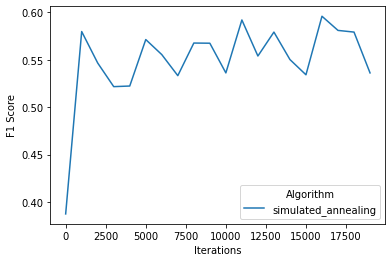

In [ ]:
df_sa = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_sa, x="Iterations", y="F1 Score", hue="Algorithm")

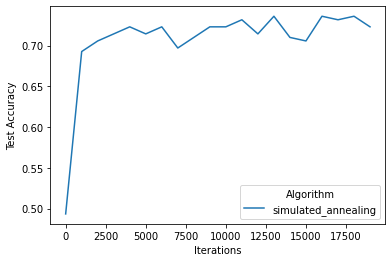

In [ ]:
sns.lineplot(data=df_sa, x="Iterations", y="Test Accuracy", hue="Algorithm")

In [ ]:
results = []
algorithm = algorithms[2]
for i in range(1, 800, 100):
        model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=200, mutation_prob = 0.1)

                                 
        model.fit(scaled_x1_train, y1_train)
        y_train_pred = model.predict(scaled_x1_train)
        y_train_accuracy = accuracy_score(y1_train, y_train_pred)

        y_test_pred = model.predict(scaled_x1_test)
        y_test_accuracy = accuracy_score(y1_test, y_test_pred)

        f1score = f1_score(y1_test, y_test_pred)

        results.append([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])
        print([i, algorithm, y_train_accuracy, y_test_accuracy, f1score])

[1, 'genetic_alg', 0.6424581005586593, 0.658008658008658, 0.07058823529411765]
[101, 'genetic_alg', 0.7728119180633147, 0.7316017316017316, 0.5921052631578947]
[201, 'genetic_alg', 0.7914338919925512, 0.7359307359307359, 0.5793103448275863]
[301, 'genetic_alg', 0.7895716945996276, 0.7359307359307359, 0.5734265734265734]
[401, 'genetic_alg', 0.7970204841713222, 0.7272727272727273, 0.5655172413793104]
[501, 'genetic_alg', 0.7914338919925512, 0.7489177489177489, 0.591549295774648]
[601, 'genetic_alg', 0.7914338919925512, 0.7489177489177489, 0.591549295774648]
[701, 'genetic_alg', 0.7914338919925512, 0.7489177489177489, 0.591549295774648]


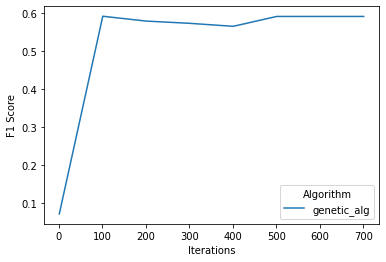

In [ ]:
df_ga = pd.DataFrame(results, columns=["Iterations", "Algorithm", "Train Accuracy", "Test Accuracy", "F1 Score"])
sns.lineplot(data=df_ga, x="Iterations", y="F1 Score", hue="Algorithm")

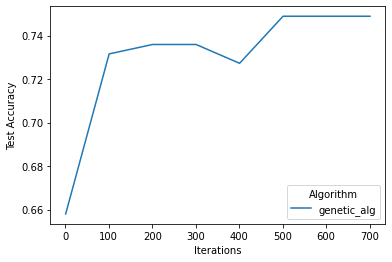

In [ ]:
sns.lineplot(data=df_ga, x="Iterations", y="Test Accuracy", hue="Algorithm")

In [ ]:
# Run time train and test for all optimizers

In [ ]:
times = []
model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                algorithm=algorithms[0], max_iters=3000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)

times.append([algorithms[0], traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithms[1], max_iters=3000,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)
times.append([algorithms[1], traintime, y_test_accuracy, testime])

model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                        algorithm=algorithms[2], max_iters=500,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=100,
                                        random_state=rs, pop_size=200, mutation_prob = 0.1)
start = time.time()    
model.fit(scaled_x1_train, y1_train)
traintime = time.time()-start
start = time.time() 
y_train_pred = model.predict(scaled_x1_train)
testime = time.time()-start
y_train_accuracy = accuracy_score(y1_train, y_train_pred)

y_test_pred = model.predict(scaled_x1_test)
y_test_accuracy = accuracy_score(y1_test, y_test_pred)

f1score = f1_score(y1_test, y_test_pred)
times.append([algorithms[2], traintime, y_test_accuracy, testime])
print(times)

[['random_hill_climb', 2.9928476810455322, 0.7489177489177489, 0.0002460479736328125], ['simulated_annealing', 5.2732179164886475, 0.7186147186147186, 0.0002372264862060547], ['genetic_alg', 102.3660786151886, 0.7489177489177489, 0.00025773048400878906]]


In [ ]:
df_times = pd.DataFrame(times, columns=["Algorithm", "Training Time", "Test Accuracy", "Testing Time"])

In [ ]:
df_times.head()

,Algorithm,Training Time,Test Accuracy,Testing Time
0,random_hill_climb,2.992848,0.748918,0.000246
1,simulated_annealing,5.273218,0.718615,0.000237
2,genetic_alg,102.366079,0.748918,0.000258


In [ ]:
df_times = df_times.melt(id_vars=["Algorithm"], 
        var_name=["Type"], 
        value_name="Value")

In [ ]:
df_times.head(20)

,Algorithm,Type,Value
0,random_hill_climb,Training Time,2.992848
1,simulated_annealing,Training Time,5.273218
2,genetic_alg,Training Time,102.366079
3,random_hill_climb,Test Accuracy,0.748918
4,simulated_annealing,Test Accuracy,0.718615
5,genetic_alg,Test Accuracy,0.748918
6,random_hill_climb,Testing Time,0.000246
7,simulated_annealing,Testing Time,0.000237
8,genetic_alg,Testing Time,0.000258


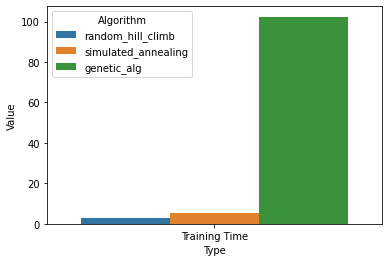

In [ ]:
sns.barplot(data=df_times[df_times["Type"]=="Training Time"], x="Type", y="Value", hue="Algorithm")

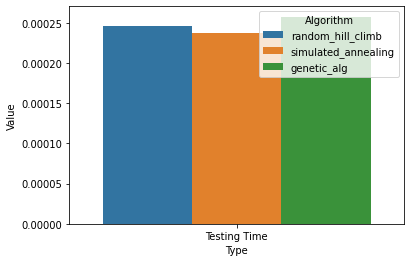

In [ ]:
sns.barplot(data=df_times[df_times["Type"]=="Testing Time"], x="Type", y="Value", hue="Algorithm")

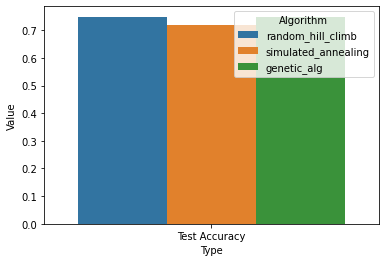

In [ ]:
sns.barplot(data=df_times[df_times["Type"]=="Test Accuracy"], x="Type", y="Value", hue="Algorithm")